In [1]:
import random
import torch

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import tools as tl

In [2]:
# 数据生成
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.0850, -1.1502]) 
label: tensor([5.9436])


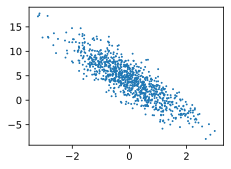

In [4]:
tl.set_figsize()
tl.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
# 小批量采样
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.6033,  1.1466],
        [ 0.1873,  2.7858],
        [-1.0367,  0.3349],
        [ 1.0053, -0.9629],
        [-2.8363, -0.2775],
        [-0.5282,  0.0317],
        [ 0.3547, -0.5106],
        [ 1.1304,  0.2651],
        [ 1.0153, -0.3193],
        [ 0.5743,  1.2331]]) 
 tensor([[ 1.4979],
        [-4.9090],
        [ 0.9872],
        [ 9.4964],
        [-0.5277],
        [ 3.0575],
        [ 6.6313],
        [ 5.5607],
        [ 7.3092],
        [ 1.1404]])


In [7]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
# 模型定义
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [9]:
# 损失函数定义
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
# 优化算法定义
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [12]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.034763
epoch2, loss 0.000126
epoch3, loss 0.000049
